## **Data Description**

1. `Session primary channel group:` The marketing channel (e.g., Direct, Organic Social)
2. `Date + hour (YYYYMMDDHH):` The specific date and hour of the session
3. `Users:` Number of users in a given time period
4. `Sessions:` Number of sessions in that period
5. `Engaged sessions:` Number of sessions with significant user engagement
6. `Average engagement time per session:` The average time a user is engaged per session
7. `Engaged sessions per user:` Ratio of engaged sessions to total sessions per user
8. `Events per session:` Average number of events (actions taken) per session
9. `Engagement rate:` The proportion of sessions that were engaged
10. `Event count:` Total number of events during the period

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# importing the data
data = pd.read_csv('website-performance-data.csv')

In [6]:
data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [7]:
# getting hold of the column names
data.columns = data.iloc[0]

# removing the 0 row
data = data.drop(0).reset_index(drop=True)

In [8]:
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [9]:
# checking the shape of the dataset
data.shape

(3182, 10)

In [10]:
# checking dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [11]:
# changing datatype of 'Date + hour (YYYYMMDDHH)' to datetime
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Session primary channel group (Default channel group)  3182 non-null   object        
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   datetime64[ns]
 2   Users                                                  3182 non-null   object        
 3   Sessions                                               3182 non-null   object        
 4   Engaged sessions                                       3182 non-null   object        
 5   Average engagement time per session                    3182 non-null   object        
 6   Engaged sessions per user                              3182 non-null   object        
 7   Events per session                                     3182 non-null 

In [13]:
# converting the columns datatype to numeric
for col in data.columns[2:]:
    data[col] = pd.to_numeric(data[col])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Session primary channel group (Default channel group)  3182 non-null   object        
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   datetime64[ns]
 2   Users                                                  3182 non-null   int64         
 3   Sessions                                               3182 non-null   int64         
 4   Engaged sessions                                       3182 non-null   int64         
 5   Average engagement time per session                    3182 non-null   float64       
 6   Engaged sessions per user                              3182 non-null   float64       
 7   Events per session                                     3182 non-null 

In [15]:
data.describe()

,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313


### **User Engagement Analysis**

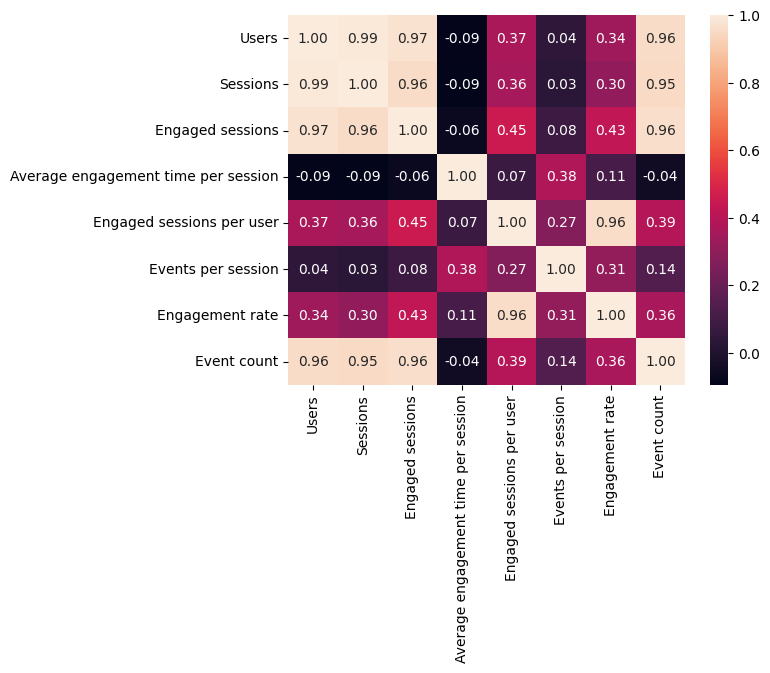

In [16]:
# checking the correlation between the features
data.iloc[:,2:].corr()

sns.heatmap(data.iloc[:,2:].corr(), annot=True, fmt='.2f')
plt.xlabel('')
plt.ylabel('')
plt.show()

We can conclude from the heatmap above that there is a strong positive correlation between the number of users, sessions, engagement sessions, and events. This is rather evident since if the number of users increases, so will the number of sessions and events that take place during those sessions. 

In addition, there is a positive correlation (0.96) between engagement rate and engaged sessions per user. 

All of the engagement metrics (average engagement time per session, engaged sessions per user, events per session, and engagement rate) show a somewhat positive correlation with one another. So, we'll look more closely at these columns to determine how their values connect to each other.

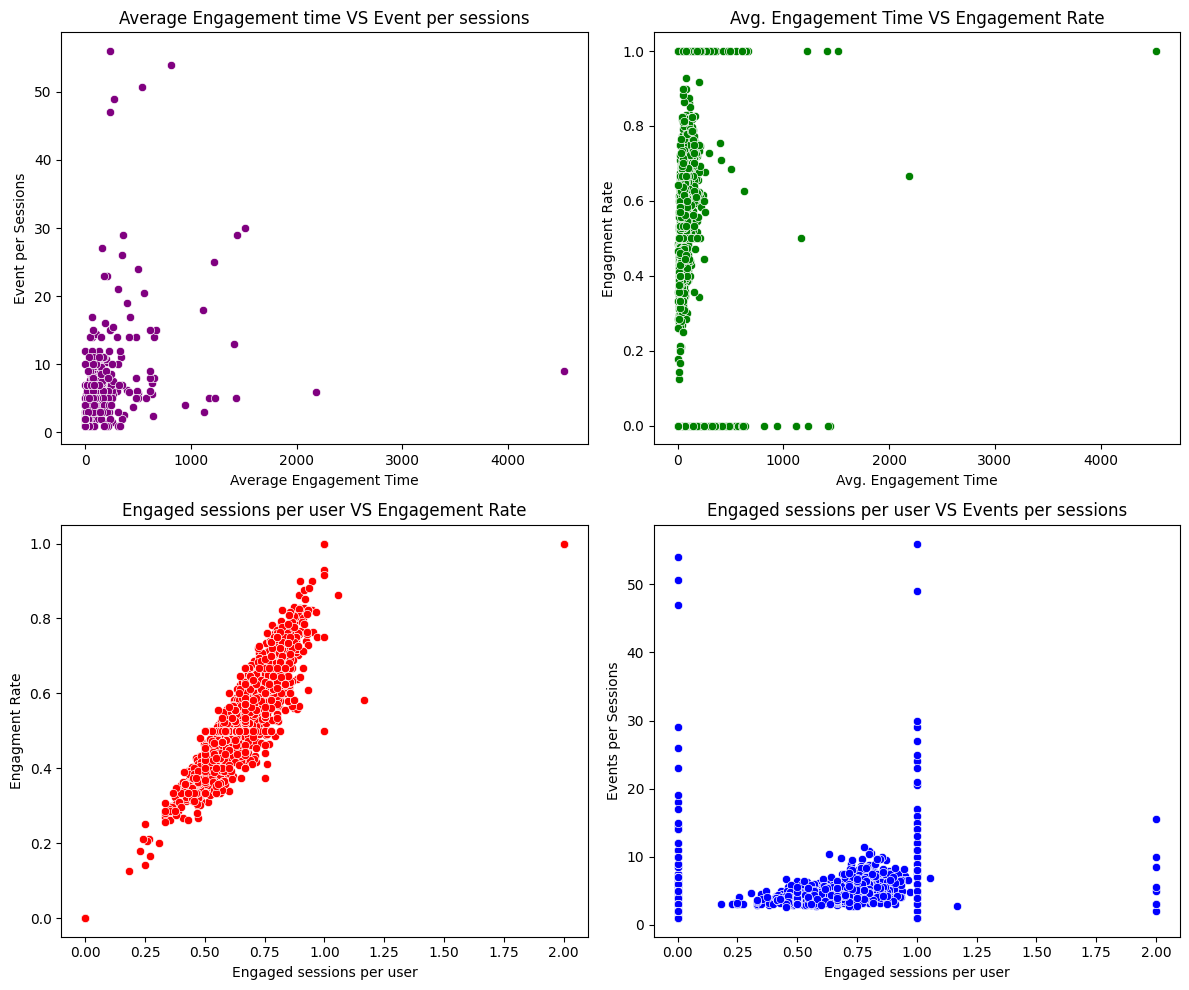

In [17]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

# Plot-1
# Average engagement time per session VS Event per session
sns.scatterplot(data=data, x=data['Average engagement time per session'], y=data['Events per session'],
                color= 'purple', ax=ax[0,0])
ax[0,0].set_title('Average Engagement time VS Event per sessions')
ax[0,0].set_xlabel('Average Engagement Time')
ax[0,0].set_ylabel('Event per Sessions')

# Plot-2
# Average Engagement time VS Engagemement Rate
sns.scatterplot(data=data, x=data['Average engagement time per session'], y=data['Engagement rate'], 
                color='green', ax=ax[0,1])
ax[0,1].set_title('Avg. Engagement Time VS Engagement Rate')
ax[0,1].set_xlabel('Avg. Engagement Time')
ax[0,1].set_ylabel('Engagment Rate')

# Plot-3
# Engaged sessions per user VS Engagemement Rate
sns.scatterplot(data=data, x=data['Engaged sessions per user'], y=data['Engagement rate'], 
                color='red', ax=ax[1,0])
ax[1,0].set_title('Engaged sessions per user VS Engagement Rate')
ax[1,0].set_xlabel('Engaged sessions per user')
ax[1,0].set_ylabel('Engagment Rate')

# Plot-4
# Engaged sessions per user VS Events per Sessions
sns.scatterplot(data=data, x=data['Engaged sessions per user'], y=data['Events per session'], 
                color= 'blue', ax=ax[1,1])
ax[1,1].set_title('Engaged sessions per user VS Events per sessions')
ax[1,1].set_xlabel('Engaged sessions per user')
ax[1,1].set_ylabel('Events per Sessions')


plt.tight_layout()
plt.show()

**Observations: -** 
- **Avgerage Engagment time VS Event per session: -** Here, we can observe that the data points are more dense at the lower avg. engagement time and there is a tendency for the number of events each session to cluster more tightly around lower values as the average engagement time increases.

- **Average Engagement Time VS Engagement Rate: -** It is evident from the average engagement time versus engagement rate that sessions with relatively short engagement times have a wide variety of engagement rates.

- **Engaged sessions per users VS Engagment Rate: -** It shows hlighly positve correlation between them.

- **Engaged Sessions per User VS Events per Sessions: -** It shows that the data points are concentrated at the lower values, indicating that an increase in the number of events per session will not have an impact on the session engagement per user.

### **Channel Performance**

In [18]:
data['Session primary channel group (Default channel group)'].value_counts()

Session primary channel group (Default channel group)
Direct            672
Organic Social    672
Organic Search    672
Referral          672
Unassigned        366
Organic Video     125
Email               3
Name: count, dtype: int64

In [19]:
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg(
    {
        'Users':'sum',
        'Sessions':'sum',
        'Engaged sessions':'sum',
        'Events per session':'sum',
        'Engagement rate': 'mean'
    }
)

In [20]:
channel_performance

,Users,Sessions,Engaged sessions,Events per session,Engagement rate
Session primary channel group (Default channel group),,,,,
Direct,30042,37203,17243,2790.374917,0.455723
Email,2,3,1,10.000000,0.333333
Organic Search,28387,33372,19425,2735.604010,0.578906
Organic Social,47572,60627,32697,3296.289387,0.541180
Organic Video,123,141,109,940.500000,0.760000
Referral,26774,30990,20653,3812.915099,0.660882
Unassigned,540,559,4,1293.250000,0.007514


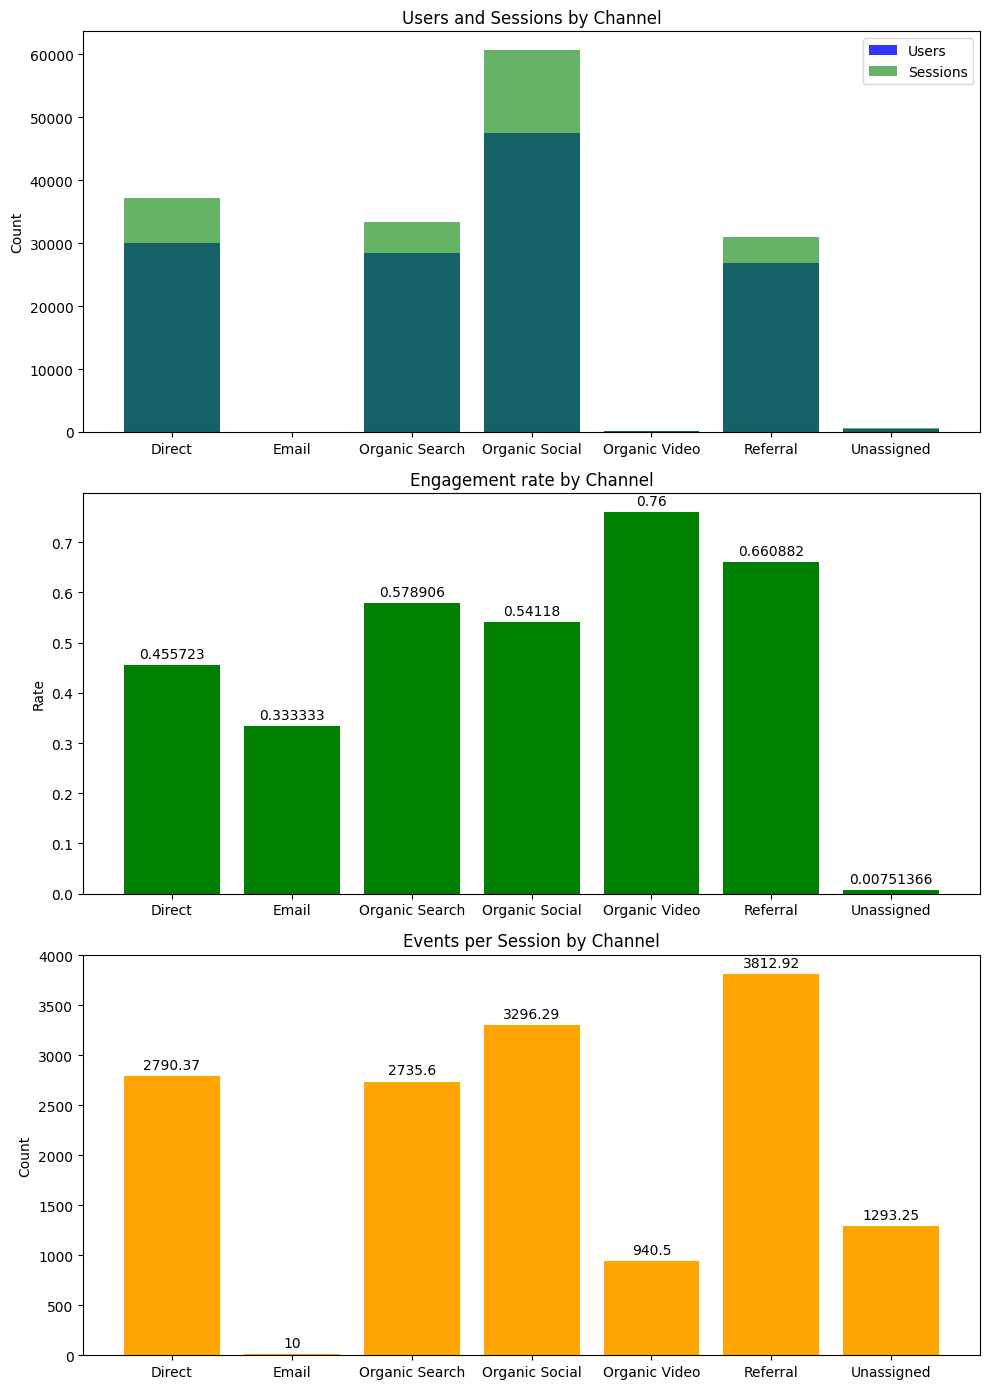

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(10, 14))

# users and sessions by channel
bars_users = ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users',
                       color='blue', alpha=0.8)
bars_sessions = ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions',
                        color='green', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# engagement rate by channel
bars_engagement = ax[1].bar(channel_performance.index, channel_performance['Engagement rate'], color='green')
ax[1].set_title('Engagement rate by Channel')
ax[1].set_ylabel('Rate')

# Add labels for Engagement Rate
ax[1].bar_label(bars_engagement, label_type='edge', padding=3)

# events per session by channel
bars_events = ax[2].bar(channel_performance.index, channel_performance['Events per session'], color='orange')
ax[2].set_title('Events per Session by Channel')
ax[2].set_ylabel('Count')

# Add labels for Events per Session
ax[2].bar_label(bars_events, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

The information highlights the advantages and disadvantages of each channel in terms of increasing traffic, interacting with users, and promoting interactions. It also shows notable differences in performance across various channels. In contrast to its lower relative engagement and events metrics, "Organic Search" does well at generating traffic, indicating that quantity of visits is more important than quality. The "Referral" and "Organic Video" channels, on the other hand, are excellent at profoundly engaging visitors despite not having the highest volume, suggesting possible areas for utilizing these advantages in marketing tactics.

### **Session Analysis**

Understanding the temporal distribution and trends in web sessions and user visits to identify peak times and low-traffic periods.

In [22]:
# number of users in a given time period
grouped_data = data.groupby(by='Date + hour (YYYYMMDDHH)').agg(
    {'Users':'sum',
     'Sessions':'sum'}
)

In [23]:
grouped_data.head()

,Users,Sessions
Date + hour (YYYYMMDDHH),,
2024-04-06 00:00:00,197,270
2024-04-06 01:00:00,107,142
2024-04-06 02:00:00,115,142
2024-04-06 03:00:00,93,122
2024-04-06 04:00:00,79,102


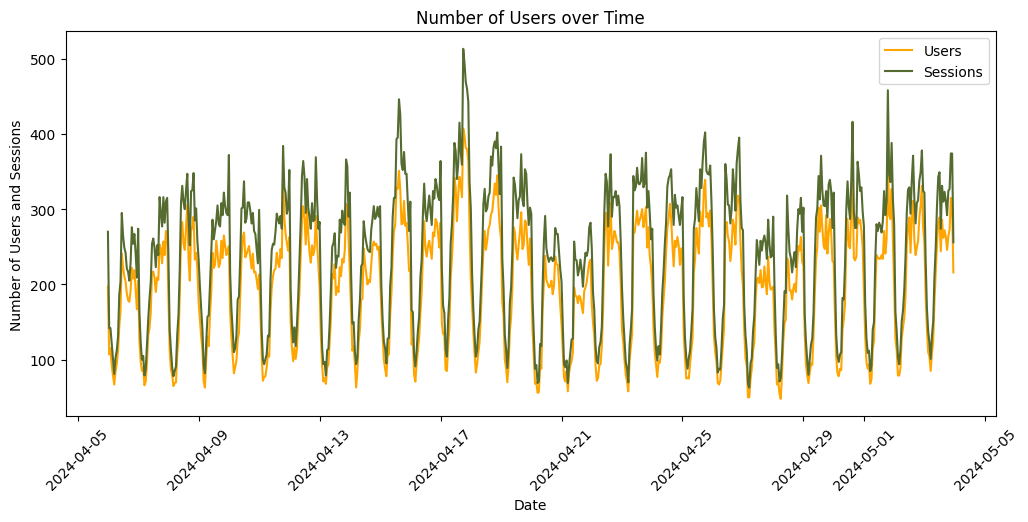

In [24]:
plt.figure(figsize=(12,5))
plt.plot(grouped_data.index, grouped_data['Users'], color='orange', label='Users')
plt.plot(grouped_data.index, grouped_data['Sessions'], color='darkolivegreen', label='Sessions')
plt.title('Number of Users over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users and Sessions')

plt.legend()
plt.xticks(rotation=45)
plt.show()

From the above line plot, we can observe that the Users and sessions are following similar trend over the time series which is pretty evident as these two are highly positivily correlated and if the number of users increase than number of sessions ahve to increase. 

Along with this, there are some peaks in sessions which might be due to some market acctivities, or events.

In [25]:
# User engagment analysis over time
user_engagement = data.groupby(by='Date + hour (YYYYMMDDHH)').agg({
    'Average engagement time per session':'mean',
    'Engaged sessions per user':'mean',
    'Events per session':'mean',
    'Engagement rate':'mean'
})

In [26]:
user_engagement.head()

,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate
Date + hour (YYYYMMDDHH),,,,
2024-04-06 00:00:00,55.070258,0.607673,3.610049,0.450262
2024-04-06 01:00:00,49.115957,0.644213,4.719012,0.489905
2024-04-06 02:00:00,66.270536,0.736716,5.372024,0.595759
2024-04-06 03:00:00,52.273710,0.568105,4.691984,0.446725
2024-04-06 04:00:00,67.222410,0.603943,4.686724,0.494964


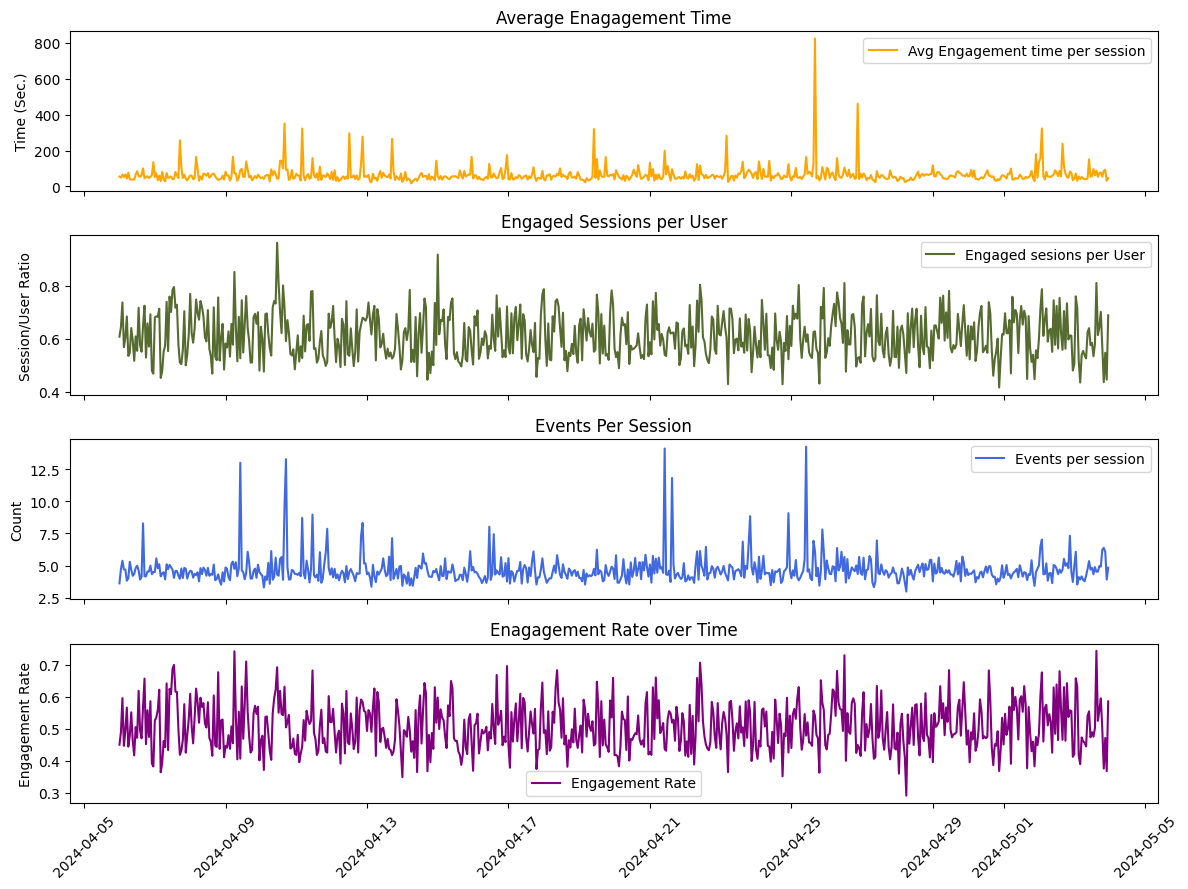

In [27]:
fig, ax = plt.subplots(4, 1, figsize=(12, 9), sharex=True)

# plot-1
# Average Engagement time per session
ax[0].plot(user_engagement.index, user_engagement['Average engagement time per session'],
           color='orange', label='Avg Engagement time per session')
ax[0].set_title('Average Enagagement Time')
ax[0].set_ylabel('Time (Sec.)')

# plot-2
# Engaged sessions per user
ax[1].plot(user_engagement.index, user_engagement['Engaged sessions per user'],
           color='darkolivegreen', label='Engaged sesions per User')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Session/User Ratio')

# plot-3
# Events per session
ax[2].plot(user_engagement.index, user_engagement['Events per session'],
           color='royalblue', label='Events per session')
ax[2].set_title('Events Per Session')
ax[2].set_ylabel('Count')

# plot-4
# Enagagement rate over time 
ax[3].plot(user_engagement.index, user_engagement['Engagement rate'],
           color='purple',label='Engagement Rate')
ax[3].set_title('Enagagement Rate over Time')
ax[3].set_ylabel('Engagement Rate')

# applying legend on eavh graph
for i in ax:
    i.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations: -**
- **Average Engagement Time per Session: -** These high peaks show the periods of time when consumers were more engaged for particular reasons, such as the release of a particular event.

- **Engaged Sessions per User: -** The session per user ratio shows a lot of fluctuations and some peaks, suggesting that consumers find the information more engaging at certain times.

- **Events per session: -** There is some variance in the number of events per session, but it is generally constant. Peaks in this garph suggests that users are utilizing more engaging content. 

- **Engagement rate: -** There are significant variations in user engagement rates, suggesting that each user is interacting with various types of content.